# Taylor Imhof
# Bellevue University | DSC 540
# Final Project Milestone 5
# 3/2/2022

# Milestone 5: Merging the Data and Storing in a Database/Visualizing Data

## Database Interactions

#### Load Each Dataset Into Individual Tables

In [1]:
# load required libraries
import pandas as pd
import sqlite3 as sql
import matplotlib.pyplot as plt
import seaborn as sns
import sqlalchemy

In [2]:
# get three datasets into dataframes from csv files
df1 = pd.read_csv('final_flat_file_data.csv', index_col=0)
df2 = pd.read_csv('final_website_data.csv', index_col=0)
df3 = pd.read_csv('final_api_data.csv', index_col=0)

View first five observations from each dataframe to ensure they were loaded properly

In [3]:
df1.head()

,id,title,is_adult,release_year,runtime,genres,rating,votes
0,tt0000574,The Story of the Kelly Gang,0.0,1906.0,70.0,Action,6.1,747
1,tt0000591,The Prodigal Son,0.0,1907.0,90.0,Drama,5.2,16
2,tt0000679,The Fairylogue and Radio-Plays,0.0,1908.0,120.0,Adventure,5.3,65
3,tt0001184,Don Juan de Serrallonga,0.0,1910.0,58.0,Adventure,3.9,20
4,tt0001258,The White Slave Trade,0.0,1910.0,45.0,Drama,5.7,139


In [4]:
df2.head()

,release_date,title,production_budget,domestic_gross,worldwide_gross
0,"Apr 23, 2019",Avengers: Endgame,400000000.0,858373000.0,2.797801e+09
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,379000000.0,241071802.0,1.045714e+09
2,"Apr 22, 2015",Avengers: Age of Ultron,365000000.0,459005868.0,1.395317e+09
3,"Dec 16, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.064616e+09
4,"Apr 25, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048360e+09


In [5]:
df3.head()

,title,year,rated,genre,country,imdb_id,imdb_rating,imdb_votes,metascore
0,Avengers: Endgame,2019.0,PG-13,Action,United States,tt4154796,8.4,1016281.0,78.0
1,Pirates of the Caribbean: On Stranger Tides,2011.0,PG-13,Action,United States,tt1298650,6.6,507945.0,45.0
2,Avengers: Age of Ultron,2015.0,PG-13,Action,United States,tt2395427,7.3,818321.0,66.0
3,Avengers: Infinity War,2018.0,PG-13,Action,United States,tt4154756,8.4,983926.0,68.0
4,Pirates of the Caribbean: At World's End,2007.0,PG-13,Action,United States,tt0449088,7.1,625898.0,50.0


#### Create DB Connection and Create SQL Tables From Pandas Dataframe

In [6]:
# create sqlite3 connection
con = sql.connect('movies.db')

In [7]:
# create new cursor object
cursor = con.cursor()

In [8]:
# create sql tables from pd dfs
df1.to_sql('flat_file_data', con, if_exists='replace', index=False)
df2.to_sql('website_scrape_data', con, if_exists='replace', index=False)
df3.to_sql('api_pull_data', con, if_exists='replace', index=False)

In [9]:
# retrieve first 5 rows to check if data stored succesfully
df1_rows = cursor.execute('SELECT * FROM flat_file_data LIMIT 5')
for row in df1_rows:
    print(row)

('tt0000574', 'The Story of the Kelly Gang', 0.0, 1906.0, 70.0, 'Action', 6.1, 747)
('tt0000591', 'The Prodigal Son', 0.0, 1907.0, 90.0, 'Drama', 5.2, 16)
('tt0000679', 'The Fairylogue and Radio-Plays', 0.0, 1908.0, 120.0, 'Adventure', 5.3, 65)
('tt0001184', 'Don Juan de Serrallonga', 0.0, 1910.0, 58.0, 'Adventure', 3.9, 20)
('tt0001258', 'The White Slave Trade', 0.0, 1910.0, 45.0, 'Drama', 5.7, 139)


In [10]:
# retrieve first 5 rows to check if data stored succesfully
df2_rows = cursor.execute('SELECT * FROM website_scrape_data LIMIT 5')
for row in df1_rows:
    print(row)

('Apr 23, 2019', 'Avengers: Endgame', 400000000.0, 858373000.0, 2797800564.0)
('May 20, 2011', 'Pirates of the Caribbean: On Stranger Tides', 379000000.0, 241071802.0, 1045713802.0)
('Apr 22, 2015', 'Avengers: Age of Ultron', 365000000.0, 459005868.0, 1395316979.0)
('Dec 16, 2015', 'Star Wars Ep. VII: The Force Awakens', 306000000.0, 936662225.0, 2064615817.0)
('Apr 25, 2018', 'Avengers: Infinity War', 300000000.0, 678815482.0, 2048359754.0)


In [11]:
# retrieve first 5 rows to check if data stored succesfully
df3_rows = cursor.execute('SELECT * FROM api_pull_data LIMIT 5')
for row in df1_rows:
    print(row)

('Avengers: Endgame', 2019.0, 'PG-13', 'Action', 'United States', 'tt4154796', 8.4, 1016281.0, 78.0)
('Pirates of the Caribbean: On Stranger Tides', 2011.0, 'PG-13', 'Action', 'United States', 'tt1298650', 6.6, 507945.0, 45.0)
('Avengers: Age of Ultron', 2015.0, 'PG-13', 'Action', 'United States', 'tt2395427', 7.3, 818321.0, 66.0)
('Avengers: Infinity War', 2018.0, 'PG-13', 'Action', 'United States', 'tt4154756', 8.4, 983926.0, 68.0)
("Pirates of the Caribbean: At World's End", 2007.0, 'PG-13', 'Action', 'United States', 'tt0449088', 7.1, 625898.0, 50.0)


#### Join Two Tables Using SQL Syntax

To join the data from the flat file with the data from the API pull, I was lucky enough that both sets contained a unique identifier `imdb_id`. I was able to join them using a basic SQL JOIN statement, making sure the ON clause contained each tables respective column name for this unique ID.

In [12]:
# join flat file data with api pull data on imdb_id
flat_api_combined = pd.read_sql('SELECT * FROM flat_file_data JOIN api_pull_data ON api_pull_data.imdb_id = flat_file_data.id', con)
flat_api_combined.head()

,id,title,is_adult,release_year,runtime,genres,rating,votes,title,year,rated,genre,country,imdb_id,imdb_rating,imdb_votes,metascore
0,tt0033563,Dumbo,0.0,1941.0,64.0,Adventure,7.2,127904,Dumbo,1941.0,G,Animation,United States,tt0033563,7.2,128394.0,96.0
1,tt0052618,Ben-Hur,0.0,1959.0,212.0,Adventure,8.1,232232,Ben-Hur,1959.0,G,Adventure,United States,tt0052618,8.1,233022.0,90.0
2,tt0055614,West Side Story,0.0,1961.0,153.0,Crime,7.5,108140,West Side Story,1961.0,Approved,Crime,United States,tt0055614,7.5,108909.0,86.0
3,tt0077413,Death on the Nile,0.0,1978.0,140.0,Crime,7.3,31434,Death on the Nile,1978.0,PG,Crime,United Kingdom,tt0077413,7.3,31457.0,59.0
4,tt0082198,Conan the Barbarian,0.0,1982.0,129.0,Action,6.9,144948,Conan the Barbarian,1982.0,R,Action,United States,tt0082198,6.9,145470.0,43.0


In [13]:
# view dimensions of newly merged df
flat_api_combined.shape

(737, 17)

During the SQL JOIN, there werew a few duplicated columns that were created. I went ahead and dropped those bad Larrys due to redundancy. There were also now two `title` columns, so I used the `duplicated()` function in tandem with the `loc` capability to drop one of the duplicated title columns.

In [14]:
# drop duplicated columns created during join
flat_api_combined.drop(['imdb_id', 'rating', 'votes', 'genres', 'year'], axis=1, inplace=True)
flat_api_combined.head()

,id,title,is_adult,release_year,runtime,title,rated,genre,country,imdb_rating,imdb_votes,metascore
0,tt0033563,Dumbo,0.0,1941.0,64.0,Dumbo,G,Animation,United States,7.2,128394.0,96.0
1,tt0052618,Ben-Hur,0.0,1959.0,212.0,Ben-Hur,G,Adventure,United States,8.1,233022.0,90.0
2,tt0055614,West Side Story,0.0,1961.0,153.0,West Side Story,Approved,Crime,United States,7.5,108909.0,86.0
3,tt0077413,Death on the Nile,0.0,1978.0,140.0,Death on the Nile,PG,Crime,United Kingdom,7.3,31457.0,59.0
4,tt0082198,Conan the Barbarian,0.0,1982.0,129.0,Conan the Barbarian,R,Action,United States,6.9,145470.0,43.0


In [15]:
# drop duplicated title column
flat_api_combined = flat_api_combined.loc[:, ~flat_api_combined.columns.duplicated()]
flat_api_combined.head()

,id,title,is_adult,release_year,runtime,rated,genre,country,imdb_rating,imdb_votes,metascore
0,tt0033563,Dumbo,0.0,1941.0,64.0,G,Animation,United States,7.2,128394.0,96.0
1,tt0052618,Ben-Hur,0.0,1959.0,212.0,G,Adventure,United States,8.1,233022.0,90.0
2,tt0055614,West Side Story,0.0,1961.0,153.0,Approved,Crime,United States,7.5,108909.0,86.0
3,tt0077413,Death on the Nile,0.0,1978.0,140.0,PG,Crime,United Kingdom,7.3,31457.0,59.0
4,tt0082198,Conan the Barbarian,0.0,1982.0,129.0,R,Action,United States,6.9,145470.0,43.0


#### Join Final Data Using SQL and Pandas Merge Logic

To join the final data from the webscraping milestone, I decided to first pull the data from the SQL database table into a new Pandas dataframe. I know this is probably redundnat as I already had a dataframe loaded from the previous milestone. However, I wanted to practice performing SQL functions using Python. Once I had the data from the SQL webscraping table, I used the `pd.merge` function to join the two dataframes on their respective `title` columns.

In [16]:
# combine flat/api table with webscrape table on title
webscrape_data_from_sql = pd.read_sql('SELECT * FROM website_scrape_data', con)
webscrape_data_from_sql.head()

,release_date,title,production_budget,domestic_gross,worldwide_gross
0,"Apr 23, 2019",Avengers: Endgame,400000000.0,858373000.0,2.797801e+09
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,379000000.0,241071802.0,1.045714e+09
2,"Apr 22, 2015",Avengers: Age of Ultron,365000000.0,459005868.0,1.395317e+09
3,"Dec 16, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.064616e+09
4,"Apr 25, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048360e+09


In [17]:
# merge flat/api df with webscrape df
all_tables_combined_df = flat_api_combined.merge(webscrape_data_from_sql, how='left', on='title')
all_tables_combined_df.head()

,id,title,is_adult,release_year,runtime,rated,genre,country,imdb_rating,imdb_votes,metascore,release_date,production_budget,domestic_gross,worldwide_gross
0,tt0033563,Dumbo,0.0,1941.0,64.0,G,Animation,United States,7.2,128394.0,96.0,"Mar 27, 2019",170000000.0,114766307.0,353166307.0
1,tt0052618,Ben-Hur,0.0,1959.0,212.0,G,Adventure,United States,8.1,233022.0,90.0,"Jun 30, 2016",95000000.0,26410477.0,91669648.0
2,tt0055614,West Side Story,0.0,1961.0,153.0,Approved,Crime,United States,7.5,108909.0,86.0,"Dec 8, 2021",100000000.0,38147373.0,71540551.0
3,tt0077413,Death on the Nile,0.0,1978.0,140.0,PG,Crime,United Kingdom,7.3,31457.0,59.0,"Feb 9, 2022",90000000.0,33665899.0,101984249.0
4,tt0082198,Conan the Barbarian,0.0,1982.0,129.0,R,Action,United States,6.9,145470.0,43.0,"Aug 19, 2011",90000000.0,21295021.0,63356133.0


In [18]:
# drop redundant columns
all_tables_combined_df.drop(['release_date'], axis=1, inplace=True)

In [19]:
# release sqlite db connection
con.close()

## Data Visualizations

After reviewing the boxplots and histograms for each of the columns with missing values, it does seem like the data is quite skewed, particularly with regard to the worldwide_gross column. I feel that this is due to a disproportionate number of films having incredibly large amounts of box-office revenue. If I were just wanting to look at the production budgets, imputing with the mean would be more feasible as the data is less skewed and less likely to be impacted from outliers.

#### Impute Missing Values Created During Merge

In [20]:
# check if null values were created during dataframe merges
all_tables_combined_df.isnull().sum()

id                    0
title                 0
is_adult              0
release_year          0
runtime               0
rated                 0
genre                 0
country               0
imdb_rating           0
imdb_votes            0
metascore             0
production_budget    52
domestic_gross       52
worldwide_gross      52
dtype: int64

Text(0.5, 1.0, 'Boxplot of Movie Financial Columns')

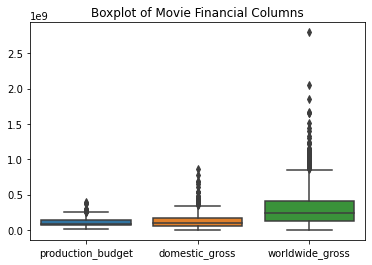

In [21]:
# check boxplot of columns with missing values to determine if mean imputation is feasible
sns.boxplot(data=all_tables_combined_df[['production_budget', 'domestic_gross', 'worldwide_gross']])
plt.title('Boxplot of Movie Financial Columns')

Text(0.5, 1.0, 'Histogram of Movie Financial Columns')

<Figure size 1080x1440 with 0 Axes>

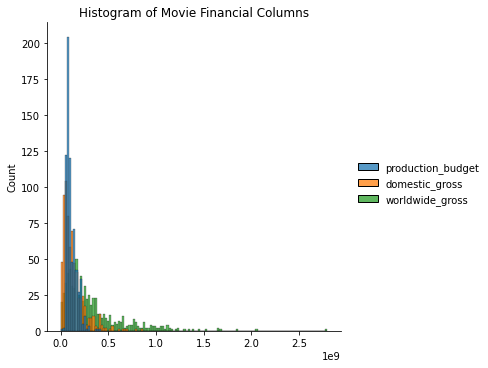

In [22]:
# check displot for columns with missing values to determine if mean imputation is feasible
plt.figure(figsize=(15,20))
sns.displot(data=all_tables_combined_df[['production_budget', 'domestic_gross', 'worldwide_gross']])
plt.title('Histogram of Movie Financial Columns')

#### Metascore By Genre

Text(0.5, 1.0, 'Film Metascore By Genre')

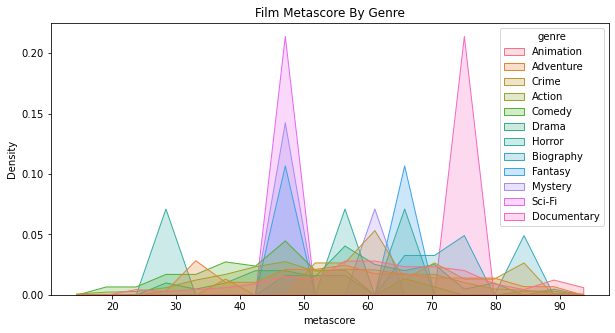

In [23]:
plt.figure(figsize=(10,5))
sns.histplot(all_tables_combined_df, x='metascore', hue='genre', element='poly', stat='density', common_norm=False)
plt.title('Film Metascore By Genre')

Observations: The genre with the highest density of successful (high metascore) appears to be animated films. I thought it was interesting to the the various spikes for the different genres across the range of the metascore metric. For instance, it seems there is quite a large amount of highly rated (score:~75) science-fiction films. However, there is also an additional spike in density for the same genre around a metascore of about 47. This made me laugh because I instantly thought about all of the b-movie science fiction films that are objectively terrible movies but are still adored by their respective fanbases.

Text(0.5, 1.0, 'Film Runtime vs. IMDB Rating')

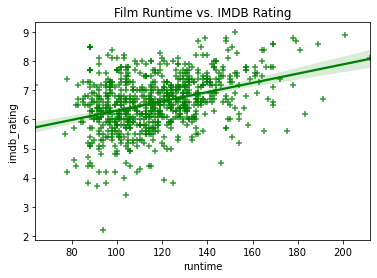

In [24]:
# imdb rating against runtime
sns.regplot(data=all_tables_combined_df, x='runtime', y='imdb_rating', color='g', marker='+')
plt.title('Film Runtime vs. IMDB Rating')

Observations: From this visualization, there is a general trend that movies with longer total runtimes tend to have a higher rating on IMDB. There is quite a bit of variation, however, and this would need to be explored in order to determine what other factors contribute to the IMDB score. I decided to go with the `+` marker as it was a little easier to spot dense clusters of data points.

Text(0.5, 1.0, 'Film Worldwide Earning Across The Years')

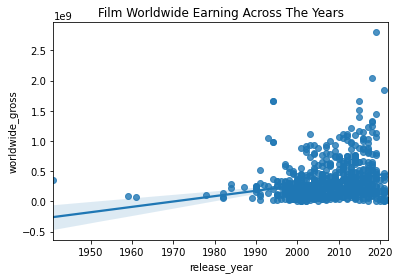

In [25]:
sns.regplot(data=all_tables_combined_df, x='release_year', y='worldwide_gross')
plt.title('Film Worldwide Earning Across The Years')

Observations: As expected, there is a general trend that over the history of cinema, films have been earning more and more at the box-office.

In [26]:
# filter for movies released between 2010 and 2021
recent_movies = all_tables_combined_df[(all_tables_combined_df['release_year'] <= 2021.0) &
                                      (all_tables_combined_df['release_year'] >= 2010.0)]
recent_movies.shape

(336, 14)

<AxesSubplot:xlabel='release_year', ylabel='worldwide_gross'>

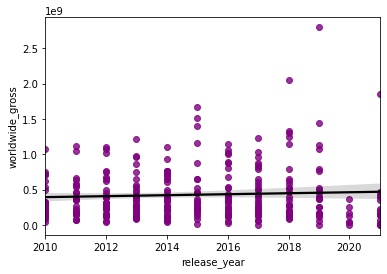

In [27]:
# replot regplot
sns.regplot(data=recent_movies, x='release_year', y='worldwide_gross',
           scatter_kws={'color':'purple'}, line_kws={'color':'black'})

I wanted to get a bit more granular on this one and see if I could idenitfy a dip in worldwide earnings as caused the pandemic. I first filtered my dataframe to only include recent movies (released within the past decade). Then, I replotted a regplot against the release year and worldwide earnings. It was quite clear that during 2020, the worldwide earning were all below the fitted replot line, which would have been caused by less theater attendance due to closures during the pandemic.

#### Countplot Of Movies By Genre

Text(0.5, 1.0, 'Amount Of Films Produced By Genre')

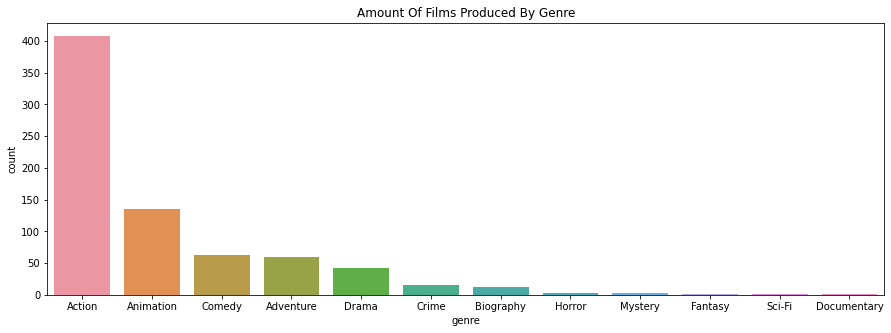

In [28]:
# display countplot to see which genres have been produced the most
plt.figure(figsize=(15,5))
ax = sns.countplot(x='genre', data=all_tables_combined_df, order=all_tables_combined_df['genre'].value_counts().index)
plt.title('Amount Of Films Produced By Genre')

Observations: The action genre is by far the most popular type of movie that has been produced. I was surprised to see that the second most produced genre was animated movies. It should also be noted that during a previous milestone step, I extracted only one genre if there were multiple genres for each individual film. The results would likely be much different if I was able to figure out an approach to create more unique, mixed-style genre labels.

#### Countplot Of Movies By Rating

I was also curious to see similar count information for the movies by their ratings (e.g., G, PG, PG-13...)

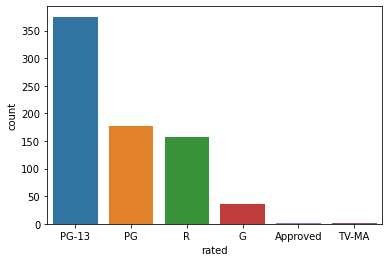

In [29]:
# display countplot of genres to see which ones have been produced the most
ax = sns.countplot(x='rated', data=all_tables_combined_df, order=all_tables_combined_df['rated'].value_counts().index)

Observations: I was not surprised to see that most of the movies were rated PG-13 as this is the most accessible rating. With that, I mean that PG-13 rated films are likely to see more movie goers, as parents are less likely to bring their children to see rated R films. I was surprised to see that the least amount of films are rated G. However, that is likely due to the reverse of my first logic in that movies that are rated G attract less movie goers and thus be less profitable and appealing to film makers.

## Project Write-up: Lessons Learned

I must say that this project has been a wild ride. I was able to find a topic that I was interested in exploring pretty early on. I had done some basic exploring of IMDb data before starting this course. I have always been curious about what factors contribute most to whether a movie will be successful. Of course, blockbusters like the Avengers or movies from popular directors will usually draw big box-office numbers. However, I was more interested in seeing if I could identify any underlying trends for other metrics.

I was able to find a rather large .tsv file that housed movie data from IMDb. The people who curated the IMDb data files wound up splitting them into a few different files. For this reason, I did have to combine two of the files together, but this was easy enough using the merge() function built-in with the Pandas package. I did wind up filtering the data to only include information about movies; it came with data for TV shows, which I was not as interested in exploring. During this step, I started to get comfortable with the common data cleaning steps.

I think I was a little too confident after working with the flat-file data because the web scraping milestone gave me much trouble. Working through the BeautifulSoup assignment from the book did not prepare me for the work required for this step. I wound up having to scour quite a few guides and YouTube videos. However, after getting my cleaned dataset at the end of milestone three, I must say that the power enabled by bs4 is incredible. 

I learned so much during this step, not just handling Pandas data but also general steps to working with data across the Internet (e.g., handling HTTP errors and adding headers to URL requests). I am so thankful for the immense number of helpful coders both in this program and online. Without their help and troubleshooting efforts, I do not believe I would have gotten this part of the project accomplished.

I initially wanted to work with the official IMDb API endpoints for the API milestone. However, after requesting access a few times (they had me re-submit my applications twice), I was denied access to their free API endpoint. Fortunately, during one of the weeks where we learned about making API requests, the textbook referenced OMDb’s API, which was a godsend for this project section. I wound up using some of the logic from the chapter, but I had to tweak it quite a bit for my project’s needs.

The final step involving databases went rather smoothly. I have used SQL quite a bit, and the Python syntax for sqlite3 was very easy to pick up. It was also easy for me to join the data from my three data sources, as two of them housed the same IMDb identification number, and I joined the last dataframe on matching movie titles. Also, it was nice to expand further my understanding of the Seaborn library for the visualization requirements. That library always impresses me with how simple the code creates pleasing visualizations.

Overall, I enjoyed working on this project. It might have had me banging my head against the wall a few nights, but I feel that I gained so much useful experience working through each milestone. I am looking forward to further increasing my skills in future projects!
